In [69]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

## 1D, Constant Function

In [70]:
model_list1 = loader(data_path("sparse_regularisation_model"))
model_list2 = loader(data_path("sparse_standard_model"))

In [71]:
loss1 = np.array([model.loss for model in model_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([model.loss for model in model_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

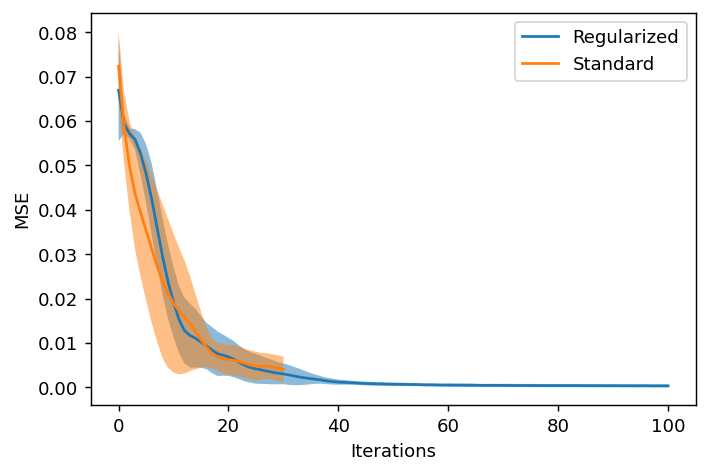

In [72]:
start = 0
stop = 31
alpha = 0.5
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(spacing2, (avg2 - std2)[:stop], (avg2 + std2)[:stop], alpha=alpha)
plt.plot(spacing1, avg1)
plt.plot(spacing2, avg2[:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Regularized", "Standard"])
plt.show()

In [40]:
map_params = np.array([model.map_params for model in model_list1])

In [41]:
map_params_avg = np.mean(map_params, axis=0)
map_params_std = np.std(map_params, axis=0)

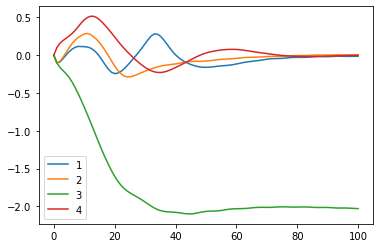

In [68]:
plt.plot(map_params[4])
#plt.fill_between(list(range(101)), map_params_avg[:,0] - map_params_std[:,0], map_params_avg[:,0] + map_params_std[:,0], alpha=alpha)
plt.legend(["1", "2", "3", "4"])
plt.show()

### Test Data

In [28]:
np.random.seed(42)

n = 100
n_features = 4

x = np.random.uniform(0, np.pi, (n, n_features))
y = scaler(x[:,2], a=0.1, b=0.9).reshape(-1,1)

In [25]:
loss_list_reg = []
for model in model_list1:
    y_pred = model.predict(x)
    loss = np.mean((y_pred - y)**2)
    loss_list_reg.append(loss)

print(loss_list_reg)

loss_reg = np.mean(loss_list_reg)
loss_reg_std = np.std(loss_list_reg)

[0.009272379162898374, 0.0008883147087295406, 0.002089462449113539, 0.004247510507453725, 0.0014521826473235945, 0.0020418627071142914]


In [26]:
loss_list_standard = []
for model in model_list2:
    y_pred = model.predict(x)
    loss = np.mean((y_pred - y)**2)
    loss_list_standard.append(loss)

loss_standard = np.mean(loss_standard)
loss_standard_std = np.std(loss_list_standard)

In [27]:
print(loss_reg, loss_reg_std)
print(loss_standard, loss_standard_std)

0.0033319520304388437 0.0028530664484755467
0.004922349448646716 0.00279900590504358


In [29]:
y_pred = model_list2[0].predict(x)

In [32]:
print(y_pred.flatten())
print(y.flatten())

[0.7058 0.1236 0.2765 0.2333 0.403  0.3399 0.227  0.7018 0.6628 0.7606
 0.1686 0.2814 0.8809 0.3617 0.0996 0.8748 0.1572 0.7868 0.7679 0.4176
 0.3804 0.7474 0.1708 0.8    0.1568 0.2774 0.4667 0.3146 0.4567 0.9076
 0.3366 0.7106 0.4301 0.8807 0.3911 0.5648 0.7138 0.8393 0.8368 0.2395
 0.634  0.552  0.7105 0.7285 0.8563 0.8341 0.7814 0.1579 0.3406 0.5887
 0.2431 0.2288 0.4985 0.8077 0.6137 0.1284 0.9078 0.8145 0.1828 0.7269
 0.6512 0.7493 0.2558 0.189  0.5226 0.2419 0.6211 0.781  0.3533 0.6376
 0.4608 0.5745 0.2549 0.1531 0.7219 0.4996 0.3779 0.5168 0.7968 0.1952
 0.6222 0.5032 0.3417 0.1758 0.4396 0.1271 0.603  0.4774 0.1456 0.8653
 0.4267 0.8559 0.1939 0.1749 0.7895 0.6552 0.3135 0.745  0.4404 0.8097]
[0.68677744 0.13092964 0.1        0.23299271 0.43929417 0.32398546
 0.24771459 0.58413062 0.87948442 0.64738378 0.1113857  0.34012404
 0.88274456 0.57617544 0.12032562 0.76657248 0.19925738 0.71997672
 0.66604453 0.37868773 0.35594962 0.68480799 0.18166421 0.71892295
 0.10398765 0.3423055